<a href="https://colab.research.google.com/github/Ryan-Jo1/Upright/blob/main/IC%26AI_Offical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Engineering Club - Ice Cream and AI Workshop
### By Ethan Silverstein

In [ ]:
# Run this to download and import all dependenices
!pip install tiktoken
import tiktoken
import base64
import os
from google import genai
from google.genai import types

## First lets setup an account and get an API key from Google AI studio

[Google AI Studio](https://aistudio.google.com/app/prompts/new_chat)

In [ ]:
# Setting up the AI Client (Very insecure but easy for sake of workshop...)
API_KEY = "YOUR_KEY_HERE" # @param {type:"string"}
client = genai.Client(
        api_key=API_KEY,
    )

In [ ]:
# @title Testing if the API Key works!
model = "gemini-2.0-flash"
contents = [
    types.Content(
        role="user",
        parts=[
            types.Part.from_text(
                text="""Hello!"""
            ),
        ],
    ),
]
generate_content_config = types.GenerateContentConfig(
    temperature=1,
    top_p=0.95,
    top_k=40,
    max_output_tokens=8192,
    response_mime_type="text/plain",
)

for chunk in client.models.generate_content_stream(
    model=model,
    contents=contents,
    config=generate_content_config,
):
    print(chunk.text, end="")

# Part 1: How Large Language Models Work

### What is an LLM?

Large Language Models (LLMs) are advanced deep neural networks designed to process and generate human-like text. They are primarily built using the Transformer architecture, which relies on self-attention mechanisms to capture relationships between tokens in a sequence.

### Tokens

A **token** is the smallest unit of text that a language model processes. It can be a word, subword, character, or punctuation mark, depending on the **tokenizer** used. For example, in the sentence:

*"The quick brown fox jumps."*

- A **word-level tokenizer** might split it into:  
  `["The", "quick", "brown", "fox", "jumps", "."]`
- A **subword tokenizer** (like Byte Pair Encoding) might break it down further:  
  `["The", "qui", "ck", "brown", "fox", "jump", "s", "."]`
- A **character-level tokenizer** would treat each letter and punctuation mark as a token.

Tokens are essential because LLMs predict text **token by token** rather than by full words or sentences.




In [ ]:
# @title Tokenization Demo

encoding = tiktoken.get_encoding("cl100k_base")

input_text = 'A quick brown fox jump' # @param {type:"string"}

# Tokenize the input string
tokens = encoding.encode(input_text)

# Decode tokens back to string
decoded_tokens = [encoding.decode([token]) for token in tokens]

# Output results
print(f"Original Text: {input_text}")
print(f"Tokens: {tokens}")
print(f"Decoded Tokens: {decoded_tokens}")



### Autoregressive Token Prediction

At the heart of many LLMs (such as the GPT series) is **autoregressive token prediction**. In this process, the model generates text one token at a time. For each new token, the model conditions its prediction on all previous tokens generated so far. This process is guided by the chain rule of probability:
  
$
P(x_1, x_2, \dots, x_T) = P(x_1) \times P(x_2|x_1) \times P(x_3|x_1,x_2) \times \cdots \times P(x_T|x_1,\dots,x_{T-1})
$

In simpler terms, given a prompt, the model predicts the next token (a word or part of a word), appends it to the prompt, and then uses this updated sequence to predict the subsequent token. This "next token" prediction approach underpins how text is generated in an autoregressive manner. It enables the model to produce coherent and contextually relevant sentences by effectively "building" text step by step.  

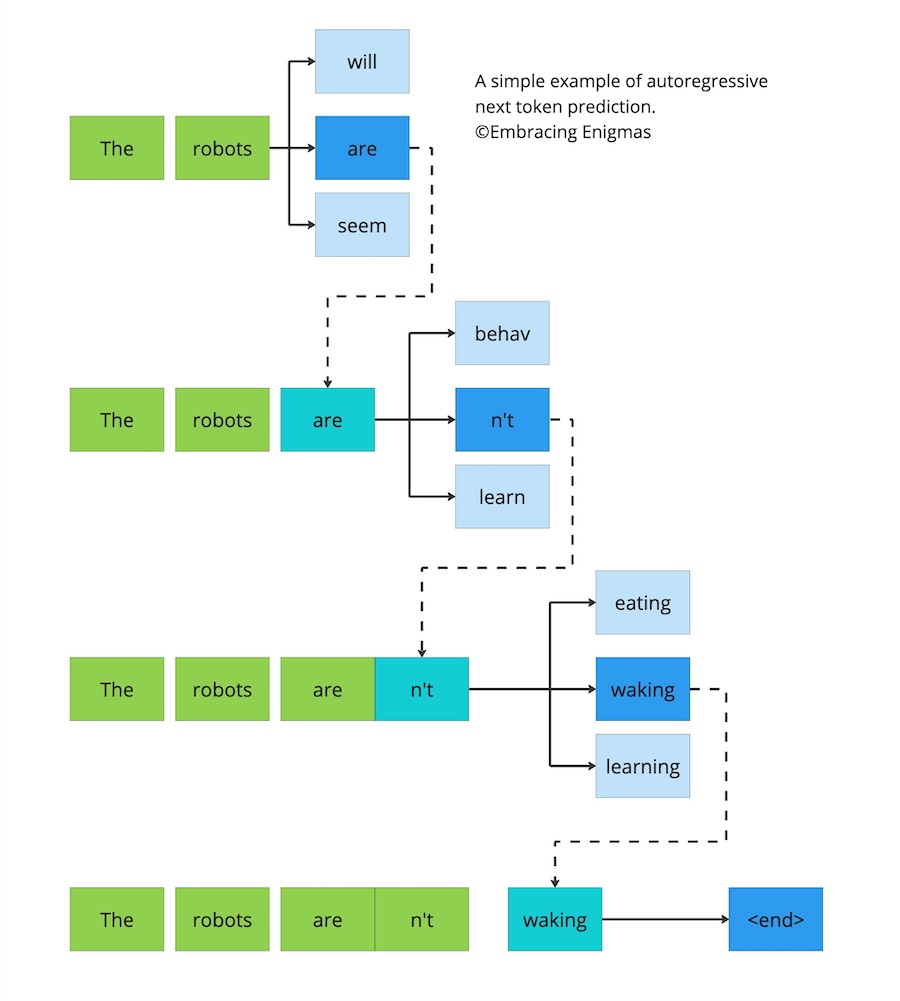

### Context Windows

The **context window** is the fixed-length segment of text (measured in tokens) that the model can consider at one time. This window sets an upper limit on how much previous information the model can use when predicting the next token. For instance, if a model has a context window of 1024 tokens, it can only attend to the most recent 1024 tokens in a conversation or document.

A larger context window enables the model to capture long-range dependencies useful in tasks like summarization or long-form generation—but also comes with higher computational and memory costs. The choice of context window size is a crucial design parameter, balancing performance and resource efficiency.  

### Self-Attention:
  The self-attention mechanism allows the model to weigh the importance of each token in the context of others. It computes attention scores by comparing embeddings, enabling the model to determine which words are most relevant for understanding the current token.

## Visualization of LLM Architecture
[LLM Visualization](https://bbycroft.net/llm)

# Choosing Models

**Gemini 2.0 Flash**

*   **Model Status:** Generally Available
*   **Input Data Types:** Text, Images, Audio, Video
*   **Output Data Types:** Text (Generally Available), Multimodal Output (Private Preview)
*   **Input Token Limit:** 1 Million
*   **Output Token Limit:** 8K
*   **Tool Use:** Google Search, Code Execution, Function Calling
*   **Best For:** Low latency scenarios, Automating tasks
*   **Pricing:** Simplified pricing
*   **Key Features:** Native tool use, multimodal input, improved agentic capabilities, multimodal live API, image generation, text-to-speech
*   **Other Features/Notes:** Next-generation features, enhanced performance across most quality benchmarks

**Gemini 2.0 Flash-Lite**

*   **Model Status:** Public Preview
*   **Input Data Types:** Text, Images, Audio, Video
*   **Output Data Types:** Text
*   **Input Token Limit:** 1 Million
*   **Output Token Limit:** 8K
*   **Tool Use:** No built-in tool usage
*   **Best For:** Cost-optimized for large scale text output use cases
*   **Pricing:** Most cost-efficient Flash model
*   **Key Features:** Multimodal Input, optimized for speed and simplicity, structured output
*   **Other Features/Notes:** Better quality than 1.5 Flash at the same speed and cost

**Gemini 2.0 Pro Experimental 02-05**

*   **Model Status:** Experimental
*   **Input Data Types:** Text, Image, Video, Audio
*   **Output Data Types:** Text
*   **Input Token Limit:** 2 Million
*   **Output Token Limit:** 8K
*   **Tool Use:** Google Search, Code Execution, Function Calling (excluding compositional function calling)
*   **Best For:** Coding, Complex scenarios
*   **Pricing:** Free during Experimental
*   **Key Features:** Improved quality, especially for world knowledge, code, and long context
*   **Other Features/Notes:** Rate limited to 10 queries per minute (QPM) during Experimental, Grounding with Google Search is subject to rate limiting

**Gemini 2.0 Flash Thinking Experimental**

*   **Model Status:** Experimental
*   **Input Data Types:** Text, Image, Audio, Video
*   **Output Data Types:** Text
*   **Input Token Limit:** 1 Million
*   **Output Token Limit:** 64K
*   **Tool Use:** No built-in tool usage like Search or code execution
*   **Best For:** Complex tasks without the need for low latency
*   **Pricing:** Free through AI Studio with limitations
*   **Key Features:** Reasoning for complex problems, features new thinking capabilities
*   **Other Features/Notes:** Thinking Mode provides strong reasoning capabilities, reduces model hallucinations, and improves accuracy of the model's responses



**Quick Note**: In practice, 1 million tokens would look like (according to Google's developer docs):
* 750,000 words
* 50,000 lines of code (with the standard 80 characters per line)
* All the text messages you have sent in the last 5 years
* 8 average length English novels
* Transcripts of over 200 average length podcast episodes

## Example of a Task that a Reasoning Model is Optimal For

[If you want to see more about reasoning models c](https://)

In [ ]:
# Basic Generation Fucntion

def generate(prompt,model_name,temp=1.0):
    model = model_name
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_text(
                    text=prompt
                ),
            ],
        ),
    ]
    generate_content_config = types.GenerateContentConfig(
        temperature=temp,
        top_p=0.95,
        top_k=40,
        max_output_tokens=8192,
        response_mime_type="text/plain",
    )

    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        print(chunk.text, end="")

In [ ]:
# @title Reasoning Demo
prompt = """
A train travels 60 miles in 90 minutes. At the same speed, how long would it take the train to travel 100 miles?
"""

print("Using gemini-2.0-flash - Non Reasoning Model:")
generate(prompt, 'gemini-2.0-flash')
print("\n---")

print("Using gemini-2.0-flash-thinking-exp-01-21 - Reasoning Model:")
generate(prompt, 'gemini-2.0-flash-thinking-exp-01-21')
print("\n---")

# Temperature



Large Language Models (LLMs) use the **temperature** parameter to control the randomness and diversity of the text they generate. Essentially, temperature scales the model’s raw output scores—called logits—before these scores are transformed into probabilities via the softmax function. Here’s how it work
s:

### How Temperature Works in LLMs

- **Low Temperature (T < 1):**  
  Lowering the temperature sharpens the probability distribution. The model becomes more confident about its top predictions because the most likely tokens are amplified, while the probabilities of less likely tokens are suppressed. This leads to more deterministic, predictable, and often more factually accurate outputs.  
  *Example:* For tasks like summarization or technical documentation, where precision is key, a low temperature is preferred.

- **High Temperature (T > 1):**  
  Increasing the temperature flattens the probability distribution, making the model more likely to choose tokens that are not the top candidates. This introduces more randomness, which can be useful for generating creative, varied, and sometimes unexpected responses. However, if set too high, the output might become incoherent.  
  *Example:* For creative writing or brainstorming, a higher temperature might generate more imaginative and diverse ideas.

### Balancing Creativity and Coherence

- **Deterministic vs. Creative Output:**  
  A temperature of 1.0 is often used as a baseline, where the probabilities remain unaltered. Adjusting the temperature up or down allows users to strike a balance between a safe, deterministic response and a more exploratory, creative one.  
  *In practice:* Lower temperatures are ideal when you need consistent and reliable responses, while higher temperatures can be leveraged for generating content with more flair and novelty.

In [ ]:
# @title Temperature Demo

prompt = "Write a short poem about a forest at dawn." # @param {type:"string"}

print("Using Low Temperature (0.2):")
generate(prompt, 'gemini-2.0-flash', 0.2)
print("\n---")

print("Using High Temperature (1.8):")
generate(prompt, 'gemini-2.0-flash', 1.8)
print("\n---")

## Tool Usage and Function Calling

In the context of Large Language Models (LLMs), "tool usage" or "function calling" refers to the ability of the model to not just generate text but also to interact with external functions or APIs to perform specific tasks. Instead of directly answering a query based solely on its internal knowledge, the model can recognize when it needs additional information or a specific action performed and then call a function (a "tool") to get that information or perform the action.

How it Works:

* Model Identifies the Need: The user provides a prompt that requires external information or an action. The model analyzes the prompt and determines that it needs to use a tool.

* Tool Selection: The model selects the appropriate tool (function) from a set of available tools. This selection is based on the tool's description and the requirements of the prompt.

* Argument Generation: The model generates the necessary arguments (input parameters) for the selected tool. This is a crucial step, as the model needs to understand what information the tool requires.

* Tool Execution: The tool is executed with the generated arguments. This step is handled by the system, not the LLM directly.

* Result Integration: The tool returns a result to the model.

* Response Generation: The model uses the result from the tool to generate a final response to the user. The response might include the information obtained from the tool or the outcome of the action performed by the tool.

Benefits:

* Access to Real-World Information: LLMs can access up-to-date information from external sources (e.g., weather APIs, search engines).

* Task Automation: LLMs can automate tasks by calling functions that interact with other systems (e.g., sending emails, scheduling appointments).

* Improved Accuracy: By relying on external tools for specific tasks, LLMs can reduce errors and improve the accuracy of their responses.



In [ ]:
import json

# Simplified tool (function)
def get_weather() -> str:
    """
    Returns the current weather in New York.
    """
    return "The current weather in New York is 25 degrees and Snowy."


config = types.GenerateContentConfig(
    tools=[get_weather],
    automatic_function_calling=types.AutomaticFunctionCallingConfig(disable=False))

chat = client.chats.create(model='gemini-2.0-flash', config=config)
response = chat.send_message("What's the weather like?")

print(response.text)

## Code Execution

We can also enable the LLM to write its own code and execute it.

In [ ]:
def generate_fib():

    model = "gemini-2.0-flash"
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_text(
                    text="""Find the 6th fibonacci number using python"""
                ),
            ],
        ),
    ]
    tools = [
        types.Tool(code_execution=types.ToolCodeExecution),
    ]
    generate_content_config = types.GenerateContentConfig(
        temperature=1,
        top_p=0.95,
        top_k=40,
        max_output_tokens=8192,
        tools=tools,
        response_mime_type="text/plain",
    )

    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        if not chunk.candidates or not chunk.candidates[0].content or not chunk.candidates[0].content.parts:
            continue
        if chunk.candidates[0].content.parts[0].text:
            print(chunk.candidates[0].content.parts[0].text, end="")
        if chunk.candidates[0].content.parts[0].executable_code:
            print(chunk.candidates[0].content.parts[0].executable_code)
        if chunk.candidates[0].content.parts[0].code_execution_result:
            print(chunk.candidates[0].content.parts[0].code_execution_result)


generate_fib()

## Grounding

Enables for tools like Google Search to be used double check the outputs to ensure the information is factual.

In [ ]:
# @title Grounding Demo
def generate_with_grounding(prompt):
    model = "gemini-2.0-flash"
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_text(
                    text=prompt
                ),
            ],
        ),
    ]
    tools = [
        types.Tool(google_search=types.GoogleSearch())
    ]
    generate_content_config = types.GenerateContentConfig(
        temperature=1,
        top_p=0.95,
        top_k=40,
        max_output_tokens=8192,
        tools=tools,
        response_mime_type="text/plain",
    )

    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        print(chunk.text, end="")

prompt = "What are the latest trends in renewable energy?" # @param {type:"string"}
generate_with_grounding(prompt)

## Structured Output
Outputs the data in a pydantic model to enable easy prompting and usage.

In [ ]:
from pydantic import BaseModel

class CountryInfo(BaseModel):
    name: str
    population: int
    capital: str
    continent: str

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents="Provide structured information for Germany.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=CountryInfo,
        temperature=0.4,
        max_output_tokens=150
    )
)
print("Structured Output:", response.text)

## Chat Conversations!

In [ ]:
chat = client.chats.create(model="gemini-2.0-flash")
response = chat.send_message_stream("I have 2 dogs in my house.")
for chunk in response:
    print(chunk.text, end="")
response = chat.send_message_stream("How many paws are in my house?")
for chunk in response:
    print(chunk.text, end="")
for message in chat._curated_history:
    print(f'role - ', message.role, end=": ")
    print(message.parts[0].text)

## Embeddings

Embeddings allow for a vector representation of of an input. It enables text to be represeted in latent space allowing for linear algebra operations to be preformed on it.

In [ ]:
result = client.models.embed_content(
        model="text-embedding-004",
        contents="What is the meaning of life?")

print(result.embeddings)
print(len(result.embeddings[0].values))

## System Instructions



In [ ]:
sys_instruct="You are a computer science professor. Your name is Shudong."
prompt = "What is a pointer?" # @param {type:"string"}

response = client.models.generate_content(
    model="gemini-2.0-flash",
    config=types.GenerateContentConfig(
        system_instruction=sys_instruct),
    contents=[prompt]
)

print(response.text)

## Some Stuff Skipped for Time

### Guide to Prompt Engineering

[Google's Guide to Prompting](https://ai.google.dev/gemini-api/docs/prompting-intro)

### Libraries like Langchain or Dspy

Allows for additional functionality for more complex applications. Does abstract a lot of functionality away though which can make development more difficult.

### Retrival Augmented Generation (RAG)

Enabled by tools like embedding creation to allow for a much larger context / dataset to be searched for reference to enable answers. I can't cover this in depth due to time but I highly reccomend researching it.

### Potential Vulnerabilites - Prompt Injection (Especially When Using Function Calling)

Prompt injection can make it so the model performs adverse or malicous behavior. Make sure to have secure systems if the model is accessing it and have very clear system instructions to mitigate this.


## Final Challenge!

Write code so that we can build a simple chat agent that gives travel tips for our upcoming spring break! Make sure it can get factual information.

Explore the documentation too!

In [ ]:
# Write your code here!